# Red Wine Quality Prediction model
### Prepared by: Sanjay Rajbanshi

This dataset is taken from the kaggle.com which is related to red wine variant of the Portuguese "Vihno verde" wine. 
The dataset can be viewed as Classification or Regression tasks. But in this task, i have used this dataset as a multiclass classification problem. 

Link :https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

###### Further analysis is done below:

## Architecture of Applied ML_algorithms - Red wine Quality Dataset

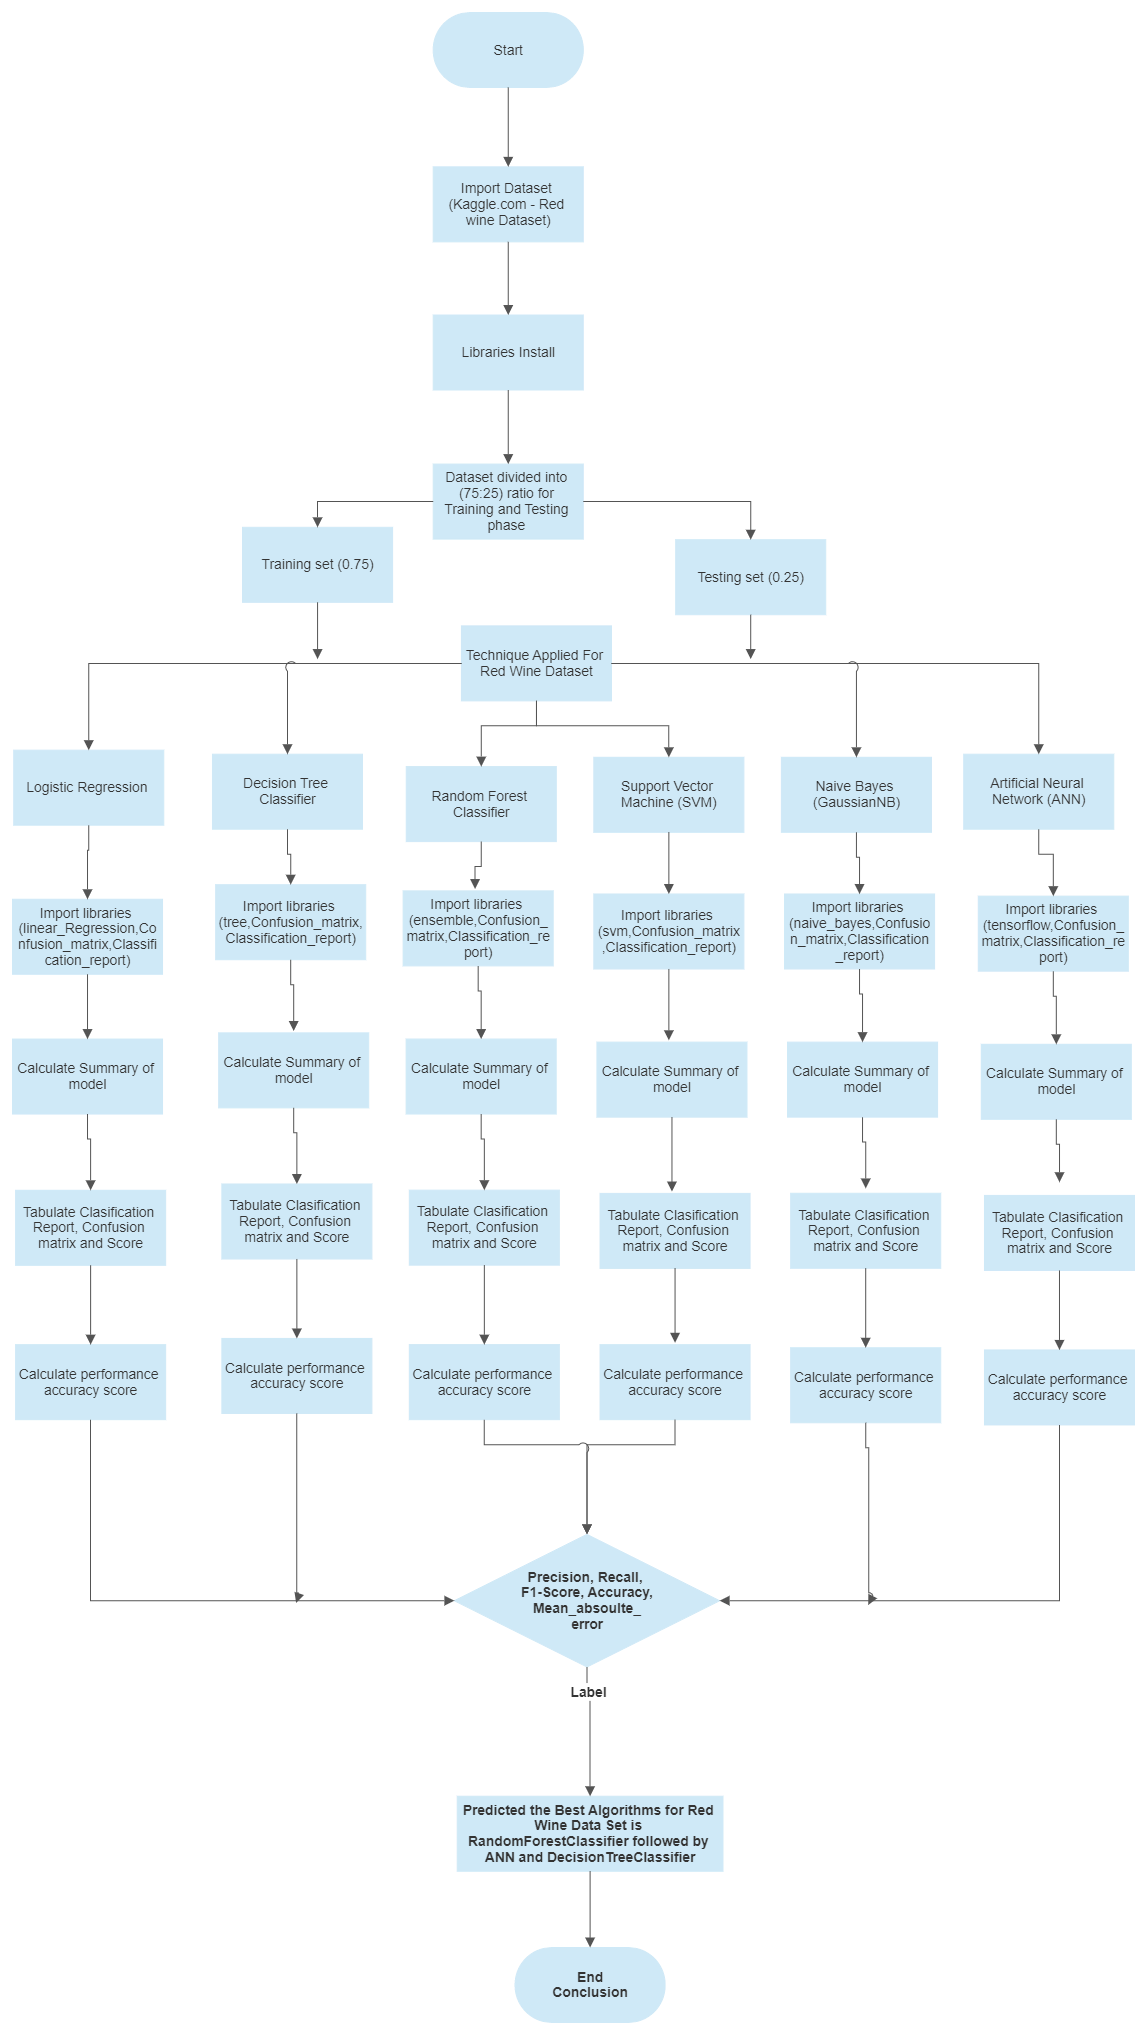

## Importing necessary libraries

Libraries are the build in machine learning models which are collection of precompiled codes that are used for specific operations. There tends to have differnt kinds of libraries in python. It made users to write and compile code in very simple and short way. 

    Pandas - Data manipulation and analysis (Row and Column)
    Numpy - Provides multidimesnional array
    Matplotlib - Graphical representatin
    Seaborn - Graphical visualization based on matplotlib
    Skit-learn - Simple and efficient tools but works with complex data. It supports Supervised and unsupervised machine                          learning algorithms.
    
 We have explore each and every libraries explained above here.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading dataset - shows 10 data
dataset=pd.read_csv('winequality-red.csv')
dataset.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


#### DATA DESCRIPTION

   1. Fixed Acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
   2. Volatile Acidity: The amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
   3. Citric Acid: Found in small quantities, citric acid can add 'freshness' and flavor to wines
   4. Residual Sugar: The amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1                                gram/liter
   5. Chlorides: The amount of salt in the wine
   6. Free Sulfur Dioxide: The free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite                             ion
   7. Total Sulfur Dioxide: Amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine,                                but at free SO2
   8. Density: The density of water is close to that of water depending on the percent alcohol and sugar content
   9. pH: Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-            4 on the pH scale
   10. Sulphates: A wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and                       antioxidant
   11. alcohol
   12. quality: Target variable

## Exploratory Data Analysis and Data Cleaning

Exploratory Data Analysis (EDA) is an approach to analyzing datasets to summarize their main characteristics, often with visual methods. EDA is used for seeing what the data can tell us before the modeling task. 

Data cleaning is the process where data which has missing values or any kind of outliers are changed, converted or filled with specific values after statsical analysis.

There are built in Sklearn libraries to see the description of data in the datasets. We have used panda’s head, unique, isnull, shape, and describe libraries to see the overview of data. Pandas.Head() provides 5 data’s in rows and columns, pandas.unique() provides values having same weight, pandas.isnull() checks whether there is null values in specified columns or not, pandas.shape which is tuple libraries shows the total rows and columns present in dataset and pandas.descibe() tell about the general statistical information. With the help of analysis from the data, we go to data cleaning process.

In [3]:
dataset.nunique() # Checking out the unique values in whole dataset

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

>We can see our target column - "quality" has 6 differnt numeric values. We will split it into binary form in later kernel.

In [4]:
dataset.isnull().sum() #Checking whether there is null values in the columns or not

fixed acidity           0
volatile acidity        0
citric acid             1
residual sugar          0
chlorides               0
free sulfur dioxide     3
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

>We find out there is 1 and 3 null values in column i.e., citric acid and free sulfur dioxide respectively. Though, it has less null values, i can drop it but due to less datas in our dataset. I will later complete those null values with the help of statistcal value.

There were like 3 null values present in column citric acid and free sulfur dioxide which could hamper the accuracy of the model. With the help of median in citric acid, we complete the null values because that column shows differential data’s i.e., outliers. And we used to mean for fill out the values of free sulfur dioxide.

In [5]:
dataset.shape #Shape of dataset - 1599:Rows and 10:Columns

(1599, 12)

In [6]:
dataset.describe() #Checking stastical overview

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1598.000000,1599.000000,1599.000000,1596.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.271120,2.538806,0.087467,15.877193,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194776,1.409928,0.047065,10.462889,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


>#### A few observations:
    1.The quality of wine varies from 3 to 8, where 6 is the average quality. 
    2.The maximum alcohol level in the wine is 14.9 and minimum is 8.4 
    3.The pH level of wine varies between 2.74 to 4.01. 
    4.The average density of wine is 0.9956. 
    5.Total sulpher dioxide varies between 6.0 to 289.0
    
>From the stastical description, we can see there is no outliers, standard deviation seems right in every columns.

### Filling null values

Although, our dataset has small number of datas. I want to explore more about filling null values with statical method. 
Here, I have used mean to fill those null vlaues because it is average value which does not differ from other values. 
I could have used median but i thought mean will be better in this kind of dataset where i doesnt seem to find outliers.
But in case of citric acid, there seems some kind of datas which has high values, so, i have used median at that null value.

In [7]:
dataset['citric acid']=dataset['citric acid'].fillna(dataset['citric acid'].median()) #Filling null values
dataset['free sulfur dioxide']=dataset['free sulfur dioxide'].fillna(dataset['free sulfur dioxide'].mean())

In [8]:
dataset.isnull().sum() #Checking whether there is still null values or not

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

>There is no such outliers on those columns i.e. unusual data. with the help of mean and median, I have completed the null values. Thus, we can see there is no such null values in the dataset

# Data Visualization

Data visualization often results in graphical images of data or concepts, which assists making decisions (Ware, 2012). It allows  to see how the data is distributed, detect outliers and allows us to convey information more effectively. It is very effective way to see represent of datas in dataset. Boxplot, Histogram, scatter-plot etc are some of graphical representation of data. In Data visualization, it shows pattern between differnt features which can help in further analyis process. 

Here, in this model, i have used necessary visualization graph which represent datas. It really helps my model to achieve higher accuracy. I had a great experience using graphs and i enjoyed too much. 

### Box plot with respect to quality column

The boxplot is a very popular graphical tool for visualizing the distribution of continuous unimodal data which shows information about the location, spread, skewness as well as the tails of the data(Hubert,2007).
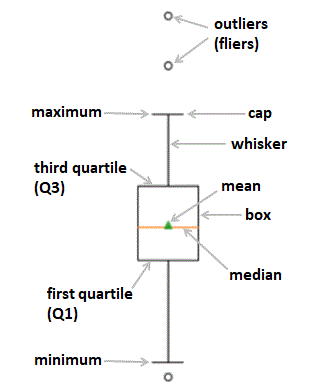

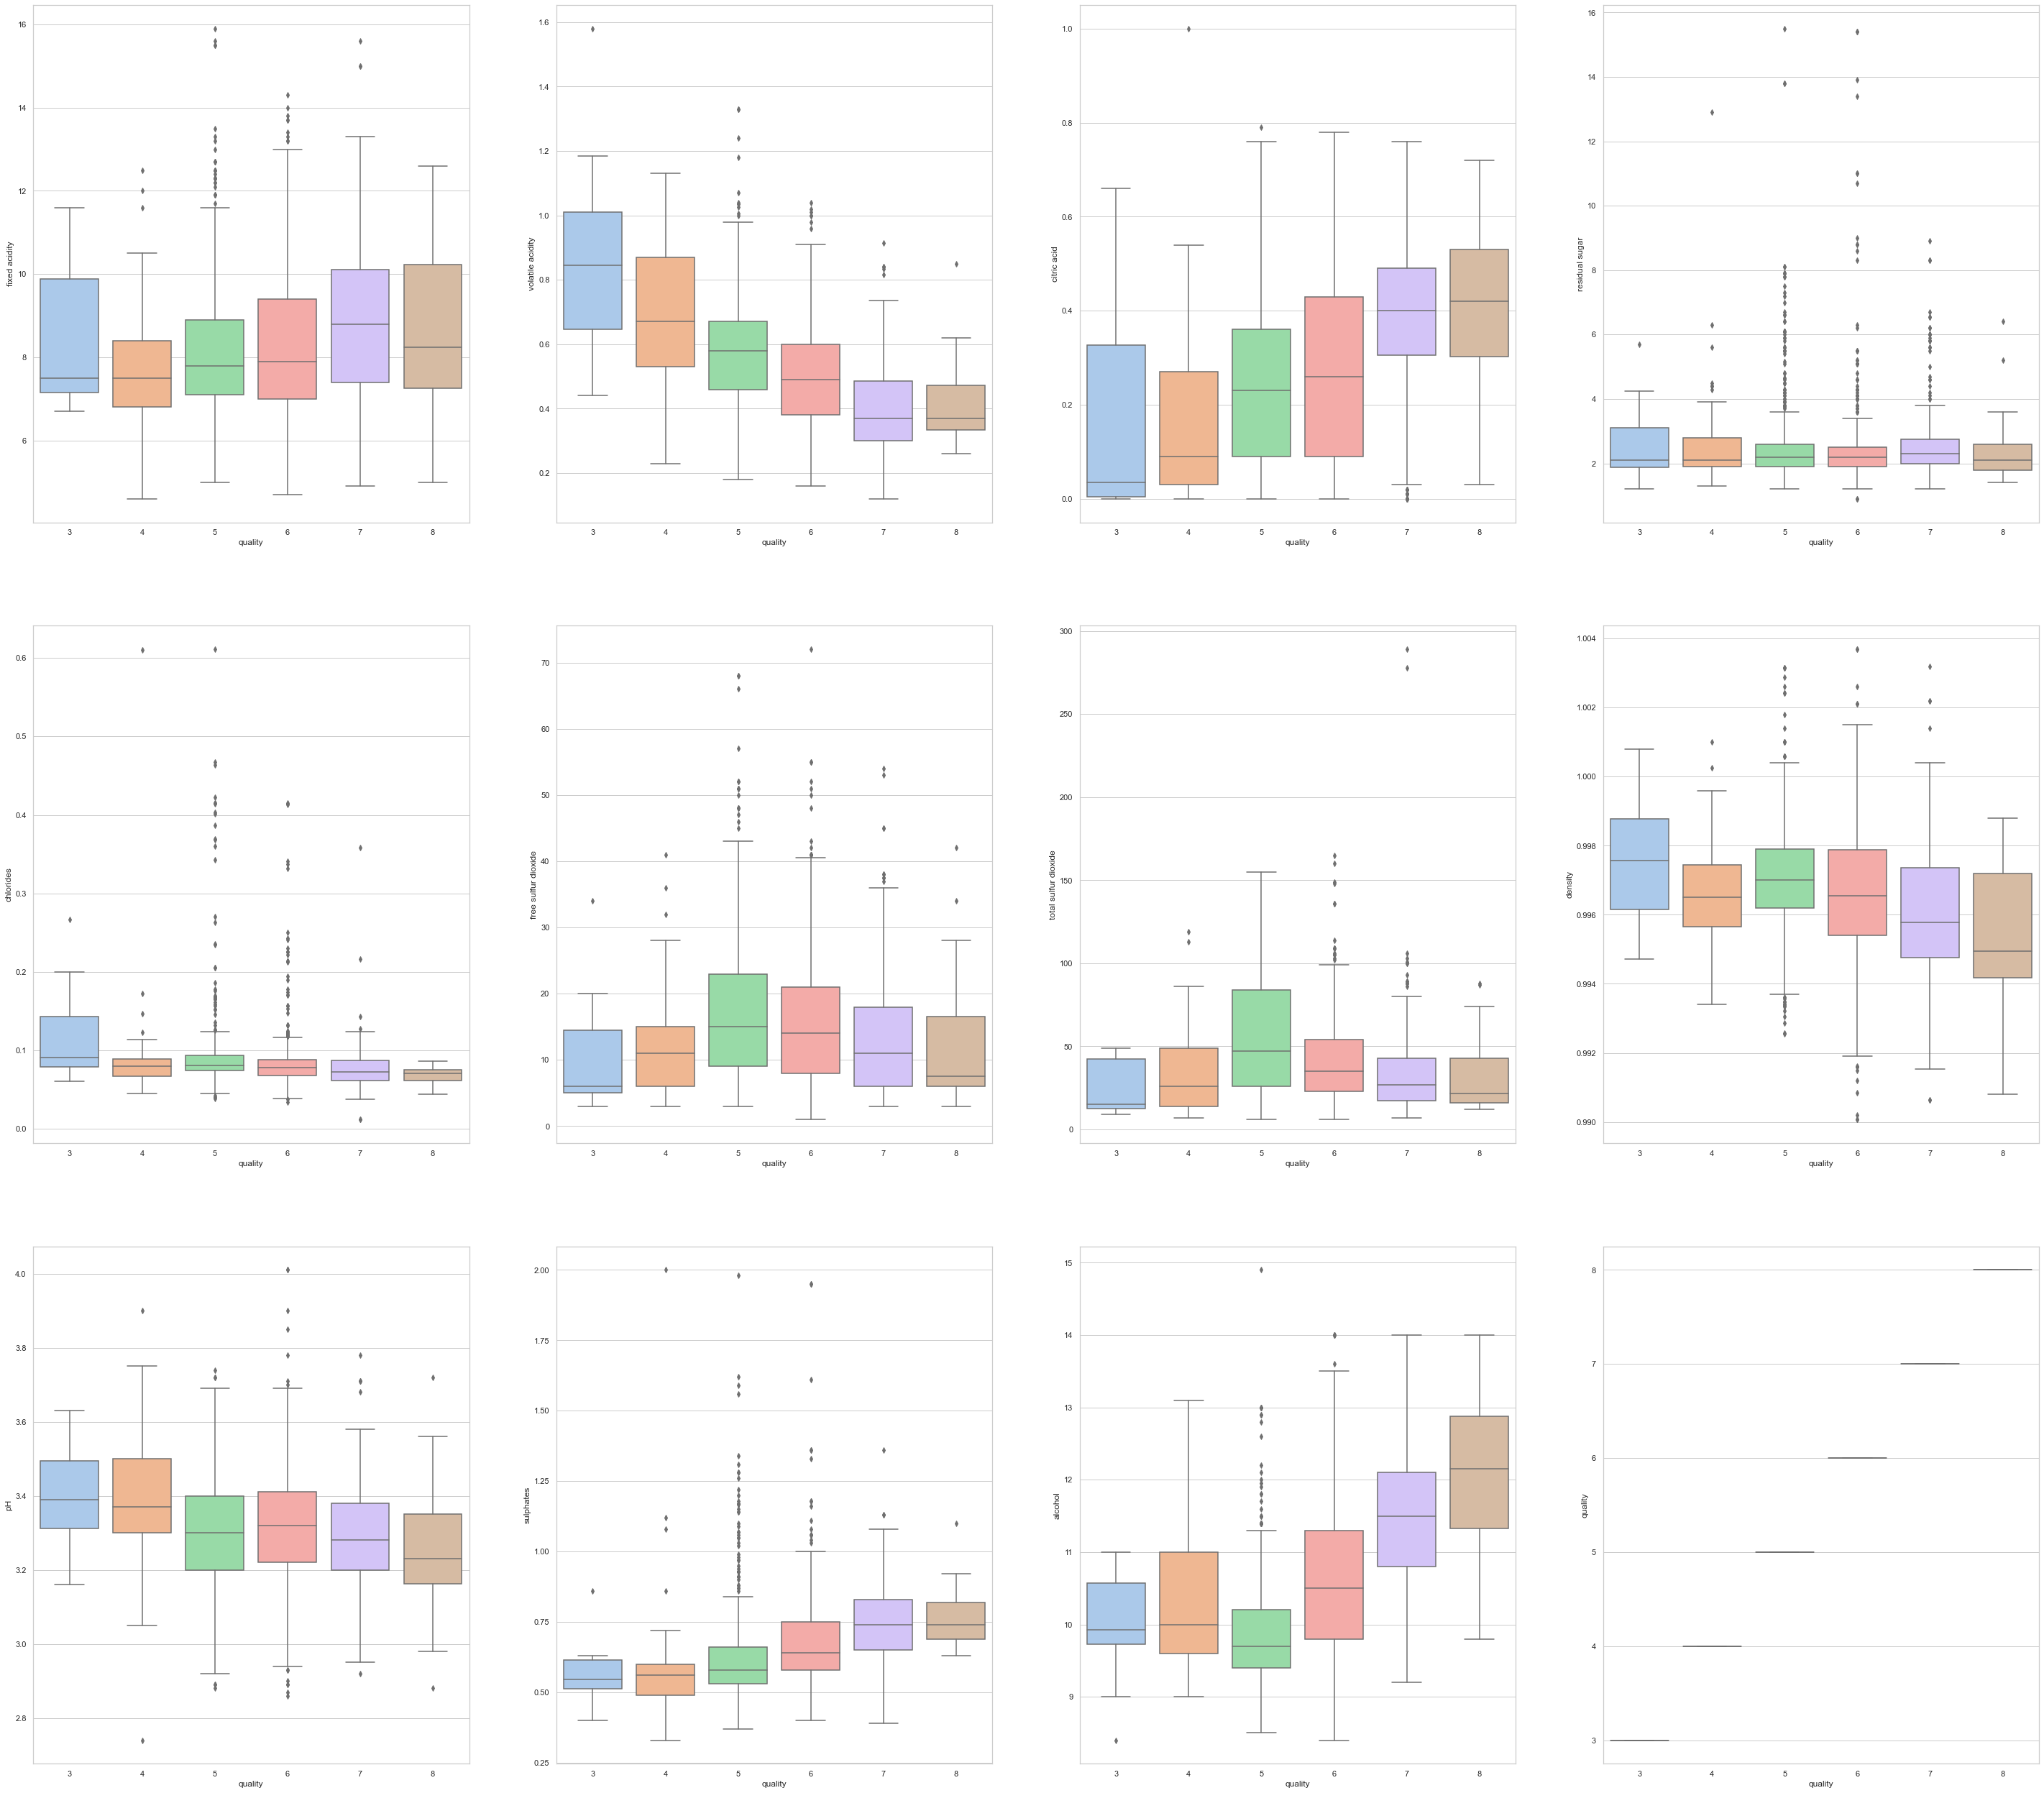

In [9]:
import warnings                     #Stopping warning sign
warnings.filterwarnings("ignore")

sns.set(style="whitegrid")          #setting style in seaborn 
fig, ax1 = plt.subplots(3,4, figsize=(50,45))  # subplot - 3:rows and 4:columns
k = 0
columns = list(dataset.columns)      # list calling dataset align to columns
for i in range(3):                   # Nested for loop
    for j in range(4):
            sns.boxplot(dataset['quality'], dataset[columns[k]], ax = ax1[i][j], palette='pastel')  # Boxplot
            k += 1
plt.show()

#### Total overview of boxplot 
   1.  fixed_acidity :- There is not much effect of fixed acidity on the quality of the wine just a slight increase.
   2.  volatile_acid :- The quality of wine increases with the decrease in the amount of volatile acids.
   3.  citric_acid :- The quality of the wine increses with increase in the amount of citric acid in the wine.
   4.  residual_suagr :- Not much effect of sugar residual on quality.
   5.  chlorides :- Not much effect in the quality of wine for a particular amount of chlorides mixed in them.
   6.  free_sulfur_dioxide :- Not much effect of free_sulfur_dioxide on quality.
   7.  total_sulfur_dioxide :- Not much effect of total_sulfur_dioxide on quality.
   8.  density :- Lower the density of wine better will be the quality of the wine. From the above boxplot we can visualize that the quality of wine increases with decrease in density.
   9.  PH :- it shows slight decrease in pH scale with good quality.
   10. sulphates :- The above plot represents that the quality of alcohol increases with the increase in the amount of sulphates the wine.
   11. Alcohol :- The above plot shows the increase in the quality of wine with the increase in alcohol.The quality of the wine is directly related to the amount of alcohol in the wine.

### Plotting distribution plot of data
Since Logistic regression model assumes a normal distribution its important for our attributes to follow a normal distribution.

Displot plots the histogram and KDE for a univariate distribution. it shows the how data's are dispersed around the average and whether it forms normal or Gaussian distribution plot which tell the normal data's present in the particular features. It helps to pick out the data's distribution and shows is there any sort of values which are unique or highly far away from the average point.

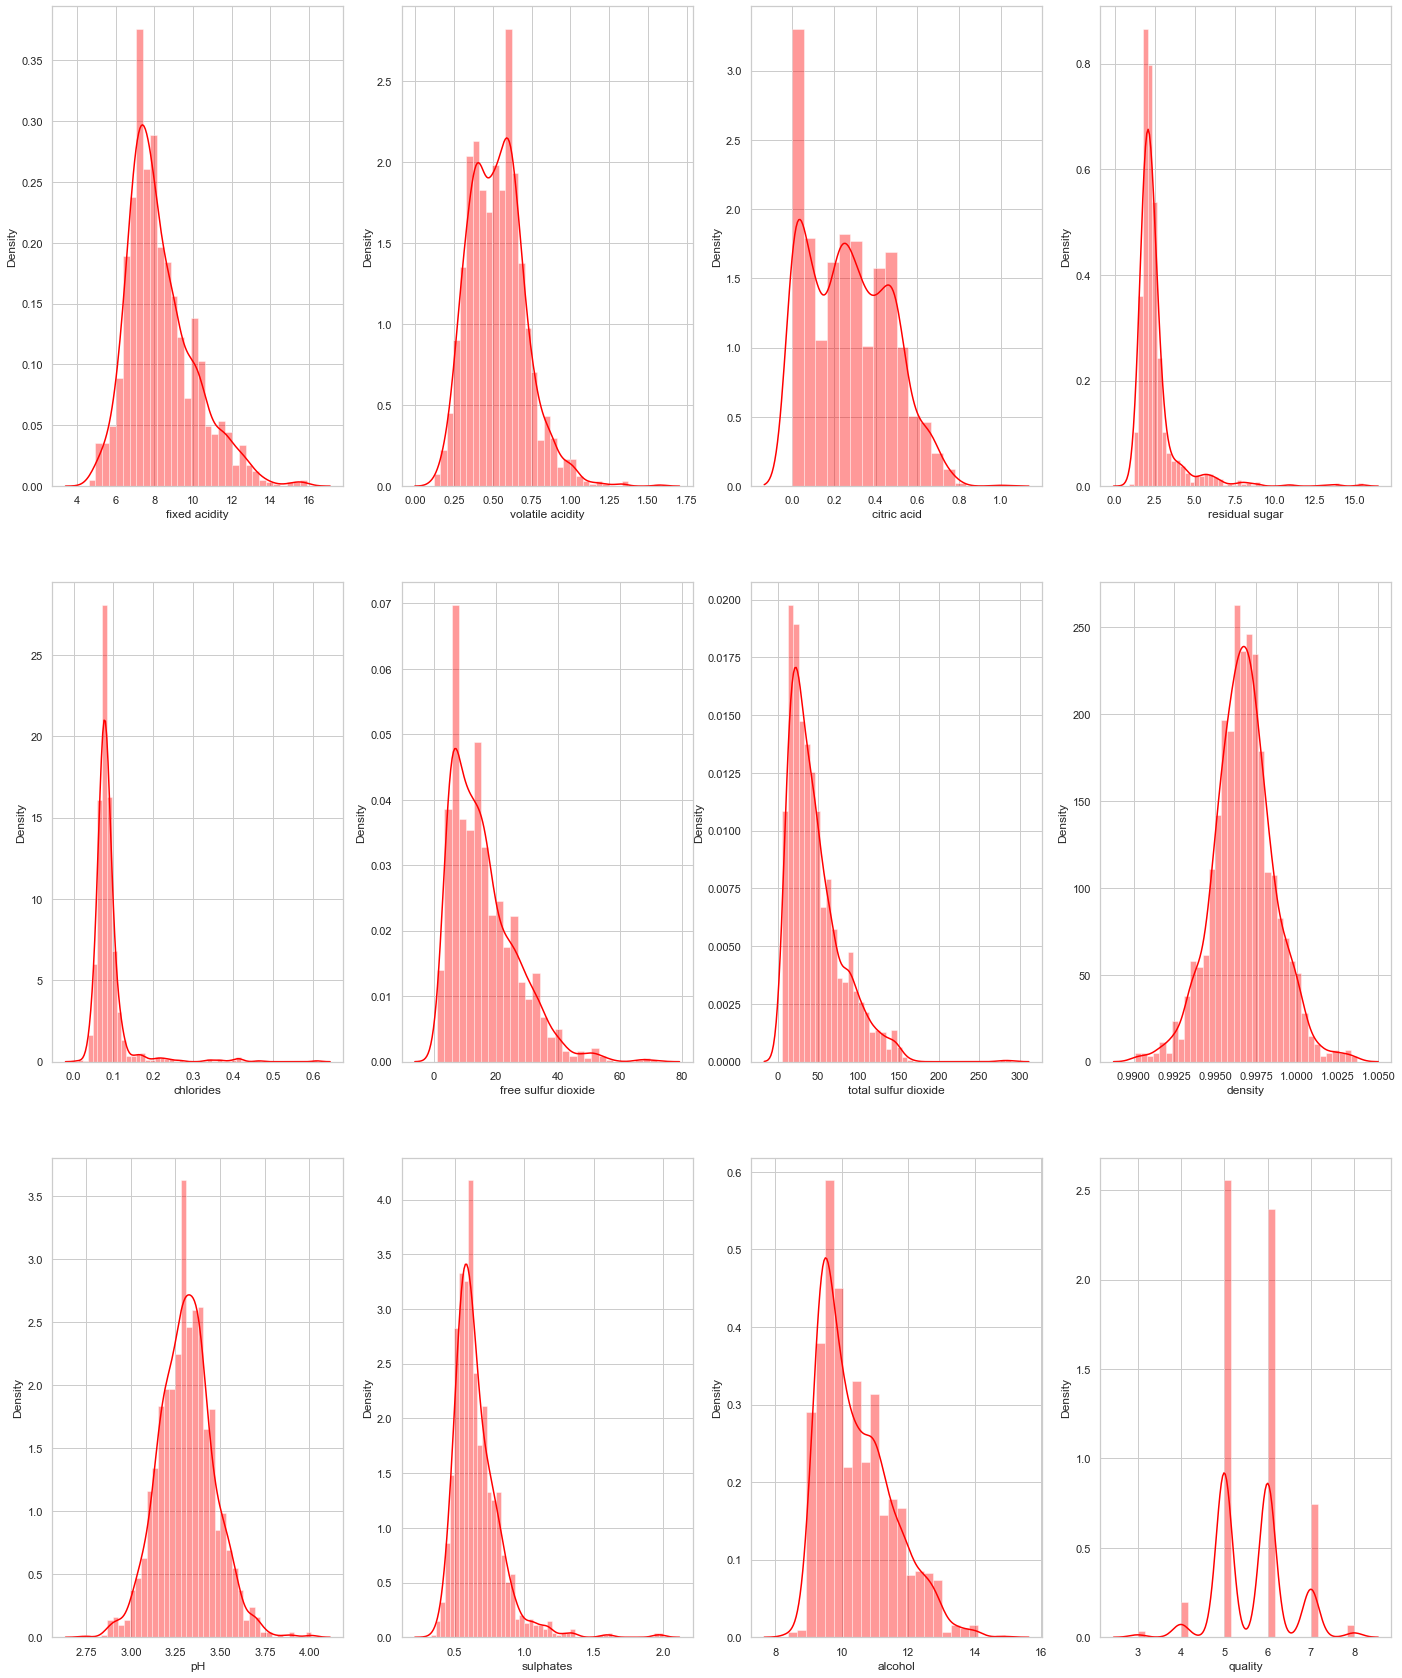

In [10]:
# Displot - overview of features
color = sns.color_palette("pastel")  #color_type=pastel

fig, ax1 = plt.subplots(3,4, figsize=(24,30)) #subplots- 3:rows and 4:columns
k = 0
columns = list(dataset.columns)     #list calling out dataset's columns
for i in range(3):                  #Nested for loop
    for j in range(4):
            sns.distplot(dataset[columns[k]], ax = ax1[i][j], color = 'red')  #Displot
            k += 1
plt.show()

>All of the column looks normally distributed. Also We see that some of our columns are highly skewed towards right. These columns include Citric acid, Residual Sugar, Chlorides, Free Sulphur Dioxide, Total Sulphur Dioxide, and Sulphates. So we will tranform by applying a log transfrom. 

### Converting the features which are right skewed into normal distribution form, so that our dataset will do great job in training and testing phase

In [11]:
def log_transform(col): # Function for log-transform
    return np.log(col[0])

dataset['residual sugar'] = dataset[['residual sugar']].apply(log_transform, axis=1)
dataset['chlorides'] = dataset[['chlorides']].apply(log_transform, axis=1)
dataset['free sulfur dioxide'] = dataset[['free sulfur dioxide']].apply(log_transform, axis=1)
dataset['total sulfur dioxide'] = dataset[['total sulfur dioxide']].apply(log_transform, axis=1)
dataset['sulphates'] = dataset[['sulphates']].apply(log_transform, axis=1)

Now, The dataset which skewed highly towards right are normalize with the help of using log_transformation.

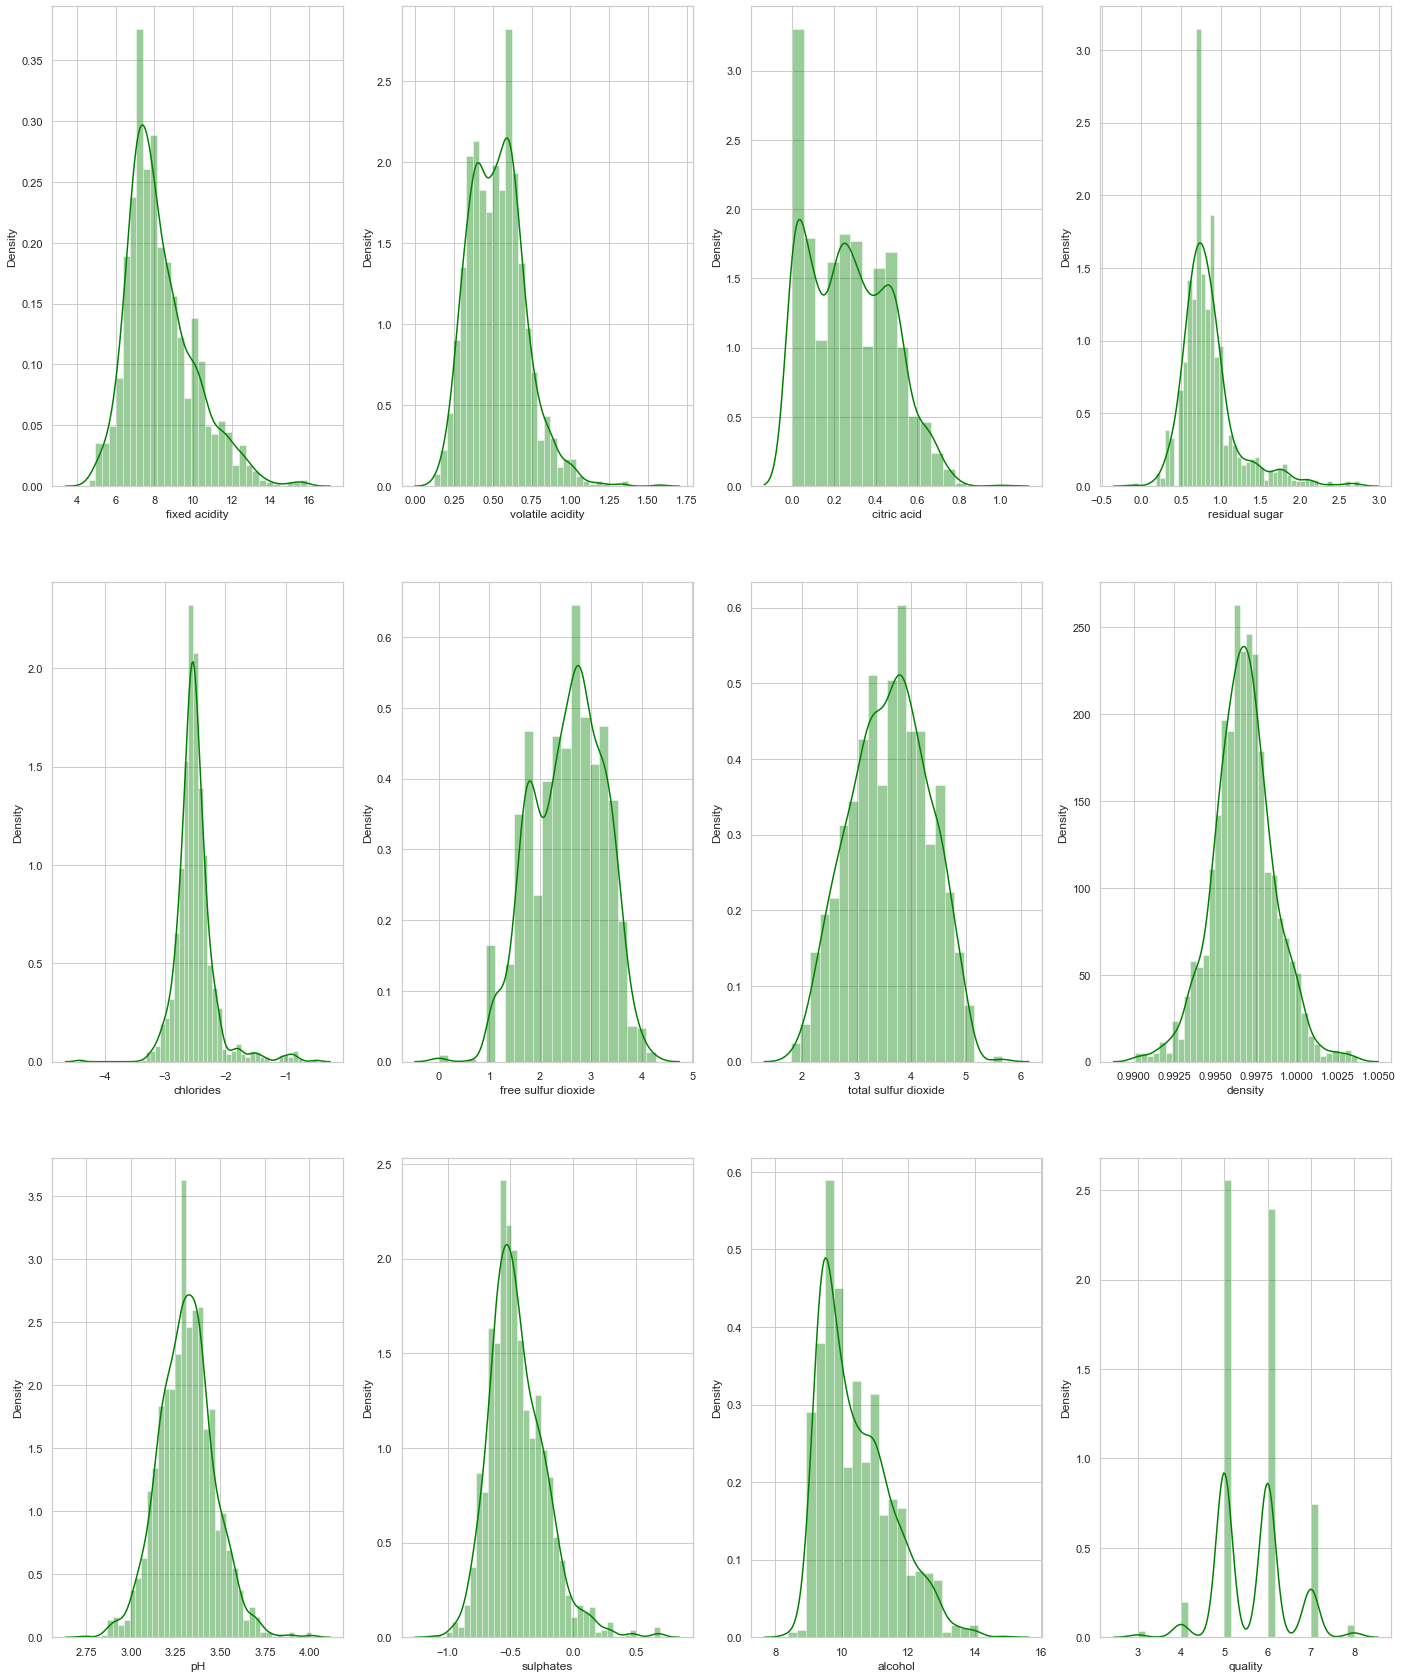

In [12]:
import warnings
warnings.filterwarnings("ignore")

color = sns.color_palette("pastel")

fig, ax1 = plt.subplots(3,4, figsize=(24,30))
k = 0
columns = list(dataset.columns)
for i in range(3):
    for j in range(4):
            sns.distplot(dataset[columns[k]], ax = ax1[i][j], color = 'green')
            k += 1
plt.show()

>Pretty much, we can see everygraph is at normally distributed i.e Normal or Gausian distribution. 

### Pairplot

A pair plot is a 2D categorical scatter plot that represents the pair wise relationship between the numerical variables in a data frame.

For a dataset with N numerical values, it plots Nc2 i.e n!/2!*(n-2)! plots. Pair Plots are useful when the number of numerical variables is high, though it is not useful for representing higher dimensional data.

In [ ]:
sns.pairplot(data=dataset,hue="quality",palette="husl")

>From the above visualization, we can see in each and every columns - quality has involvement in every its crorresponding dataset whcih seems good in analysis.

### Correleation Heatmap

A correlation is the part of statstics which shows the relation or identify the assiociation with its corresponding columns. Correlation alway tends to show relation between ranges of -1 and 1. -1 shows low relation and 1 shows strong relation between two columns or features.
A heat map uses a warm-to-cool color spectrum to show you which parts of a page receive the most attention.

In our case, we have dataset containing several attributes which seems intercorrelated with each others. Lets see what shows in Correlation Heatmap.

<AxesSubplot:>

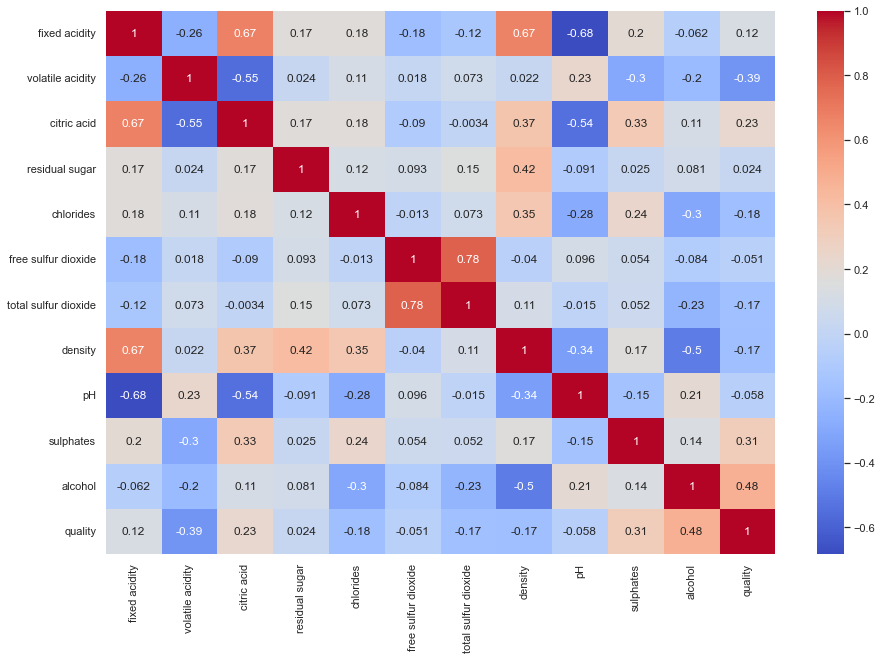

In [13]:
# correlation of dataset in graphical form
plt.figure(figsize = (15,10)) 
sns.heatmap(dataset.corr(),annot=True, cmap= 'coolwarm')

>#### From the avove heatmap, we can get quality tend to have:
    1.High alcohol percentage
    2.Low volatile acidity
    3.High sulphates
    4.High citric acid
    5.High fixed acidity

In [14]:
# Correlation
dataset.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.308642
citric acid             0.225915
fixed acidity           0.124052
residual sugar          0.023533
free sulfur dioxide    -0.050655
pH                     -0.057731
total sulfur dioxide   -0.170143
density                -0.174919
chlorides              -0.176140
volatile acidity       -0.390558
Name: quality, dtype: float64

>#### CORRELATION BETWEEN THE ATTRIBUTES
Correlation tells us how and by how much are the attributes dependent on each other. Correlation coefficient is between (-1)to 1 with -1 being highly negatively correlated and +1 with highly positively correlated.

>Graphical and normal statistical correlation seems quite small round off difference but it is ok for our dataset.

# Feature Engineering

Text(0, 0.5, 'Features')

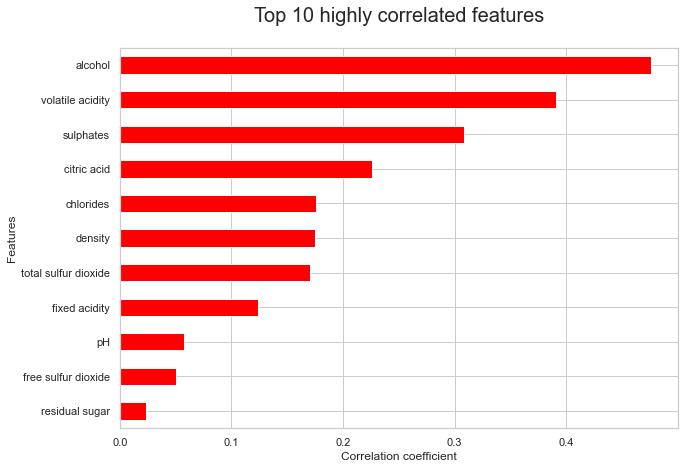

In [15]:
# Looking out the highest 10 correlated feature with respect to target - quality
plt.figure(figsize=(10,7))
dataset.corr().quality.apply(lambda x: abs(x)).sort_values(ascending=False).iloc[1:12][::-1].plot(kind='barh',color='red')

# calculating the top 10 highest correlated features
# with respect to the target variable i.e. "quality"
plt.title("Top 10 highly correlated features", size=20, pad=26)
plt.xlabel("Correlation coefficient")
plt.ylabel("Features")

>Features which has negative or low correlation with target feature - "quality" are:
    >1. pH
    >2. free sulfur dioxide
    >3. total sulfur dioxide  
    >4. density
    >5. chlorides
    >6. Volatile acidity

>Though, these features has low correleation with quality column, we cannot drop those columns. These features are correlated with other features. Thus, dropping these column will cause serious overfitting problems.


The values which being the only one appears in the features or columns i known as unique values.

In [16]:
# Checking out the unique values in column (target) - quality
dataset['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

>I find out 6 unique values in the column - quality (reference : above kernel)

### Bar-plot

A bar plot is the visualization process which present with categorical data with rectangilar bars with its height and length proporatinal to values that it represent.

Text(0.5, 1.0, 'Wine distribution by quality')

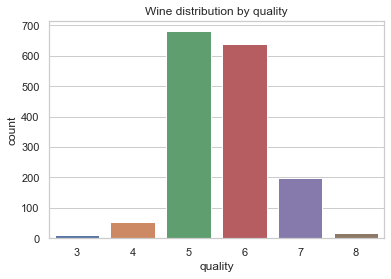

In [17]:
# Bar-plot
sns.countplot(x='quality', data=dataset).set_title("Wine distribution by quality") 

>We can see the distribution of unique values of quality i.e., target varibale in our dataset which are imbalance. 

#### Converting target's unique values into binary form

In [18]:
dataset['Quality'] =dataset['quality'].apply(lambda x : 1 if(x>5) else 0)
dataset.drop(['quality'],inplace=True,axis=1)

>Converted the unique values from (1-5) to 0 and (6-10) to 1. 
After that, we have drop the column called quality. Instead we have specifiy a new column called Quality (New target column).

>New Values
   >> 0 - Bad quality
   
   >> 1 - Good quality

In [19]:
dataset.head() #First 5 datas

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Quality
0,7.4,0.70,0.00,0.641854,-2.577022,2.397895,3.526361,0.9978,3.51,-0.579818,9.4,0
1,7.8,0.88,0.00,0.955511,-2.322788,3.218876,4.204693,0.9968,3.20,-0.385662,9.8,0
2,7.8,0.76,0.04,0.832909,-2.385967,2.708050,3.988984,0.9970,3.26,-0.430783,9.8,0
3,11.2,0.28,0.56,0.641854,-2.590267,2.833213,4.094345,0.9980,3.16,-0.544727,9.8,1
4,7.4,0.70,0.00,0.641854,-2.577022,2.397895,3.526361,0.9978,3.51,-0.579818,9.4,0


In [20]:
dataset.tail()  # last 5 datas

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Quality
1594,6.2,0.600,0.08,0.693147,-2.407946,3.465736,3.784190,0.99490,3.45,-0.544727,10.5,0
1595,5.9,0.550,0.10,0.788457,-2.780621,3.663562,3.931826,0.99512,3.52,-0.274437,11.2,1
1596,6.3,0.510,0.13,0.832909,-2.577022,3.367296,3.688879,0.99574,3.42,-0.287682,11.0,1
1597,5.9,0.645,0.12,0.693147,-2.590267,3.465736,3.784190,0.99547,3.57,-0.342490,10.2,0
1598,6.0,0.310,0.47,1.280934,-2.703063,2.890372,3.737670,0.99549,3.39,-0.415515,11.0,1


>From the above 2 kernels, we can see many things like instead of 6 unique values in "Quality" column. We can see 0 and 1 unique values.

#### For DecisionTree part used for anlysis to show the use of how Decission Tree uses the formula to calculated in backend process

In [21]:
dataset[dataset['alcohol']==9.4].value_counts().sum() #Uniue values in alcohol column i.e., 9.4 - counting alls value

103

In [22]:
dataset['alcohol'].unique() # All unique values in the alcohol column

array([ 9.4       ,  9.8       , 10.        ,  9.5       , 10.5       ,
        9.2       ,  9.9       ,  9.1       ,  9.3       ,  9.        ,
        9.7       , 10.1       , 10.6       ,  9.6       , 10.8       ,
       10.3       , 13.1       , 10.2       , 10.9       , 10.7       ,
       12.9       , 10.4       , 13.        , 14.        , 11.5       ,
       11.4       , 12.4       , 11.        , 12.2       , 12.8       ,
       12.6       , 12.5       , 11.7       , 11.3       , 12.3       ,
       12.        , 11.9       , 11.8       ,  8.7       , 13.3       ,
       11.2       , 11.6       , 11.1       , 13.4       , 12.1       ,
        8.4       , 12.7       , 14.9       , 13.2       , 13.6       ,
       13.5       , 10.03333333,  9.55      ,  8.5       , 11.06666667,
        9.56666667, 10.55      ,  8.8       , 13.56666667, 11.95      ,
        9.95      ,  9.23333333,  9.25      ,  9.05      , 10.75      ])

In [23]:
# Calculating the unique value of 'alcohol' - 9.4 and its corresponding value with respect to 1 in 'Quality' column -
# target feature and calculating thir sum
dataset[(dataset['alcohol']==9.4) & (dataset['Quality']==1)].value_counts().sum() 

22

In [24]:
# Counnting the values of Column - Good with respect to 0 and 1.
dataset['Quality'].value_counts() 

1    855
0    744
Name: Quality, dtype: int64

>> The numbers of data in "Quality" seems balance now.

In [25]:
# Checking out the unique values in column - Good
dataset['Quality'].unique()

array([0, 1], dtype=int64)

>We can see there is only 2 unique values i.e., 0 and 1 (Binary form)

### Normalization and transforming feature

Formula : $$StandardScalar=\sum\limits_{i=1}^n\frac{(x_{i}-\bar{x})}{std.}$$

In [26]:
# Importing model
from sklearn.preprocessing import StandardScaler
sc=StandardScaler() # Instance

>Standardscaler will transform the values in such a way that mean = 0 and standard deviation = 1. It will make the values present in the features small so, that it will save our time and computational power.

## Splitting the data into input features and target variable.

In [27]:
dataset.columns # List of columns names present in dataset

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'Quality'],
      dtype='object')

#### Splitting the features into Dependent = y and independent variables = X

Dependent variables are those variables which has the relationsip with the other varibles that changes with respect to the other varible i.e. Independent vaibales.
Independent variables are those varibale which's values doesn't matter with other values but its values matter to other values.

In [28]:
# 2-Dim array (Input features)
X=dataset[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']] 
y=dataset.Quality   # 1-Dim array (target variable)

> We have placed Column : "Quality" in dependent variables called y and remaining columns as X i.e., Independent variables.

In [29]:
# Scalling all the input features datas
X_scaled=sc.fit_transform(X)

> We have scaled the Independent varible with StandardScaler sklearn libraries.

## Converting the datas into trainig and testing dataset

In [30]:
# Importing the model 
from sklearn.model_selection import train_test_split
X_scaled_train,X_scaled_test,y_train,y_test=train_test_split(X,y,test_size=0.25,stratify=y,random_state=1)

The dataset has been splitted into trainig and testing dataset where we had passed X and y as data features.
>test_size = 0.25 means we had allocated just 25% of data from whole dataset for testing purpose. Remaining 75% will be used for training purpoess.

>Stratify = dataset['Quality'] =y  will ensure that both the numerical values i.e., 0 and 1 has equal sets of values i.e., 50% allocated for 0 and 50% for 1 which helps to over shadowed the unersampling problem.

>random_state=1 which ensures the data of train, test split remains same all the time.

In [31]:
X_scaled_train # Dataset represent in the form of rows and columm

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1142,6.9,0.450,0.11,0.875469,-3.146555,1.791759,2.484907,0.99354,3.30,-0.430783,11.4
948,8.9,0.120,0.45,0.587787,-2.590267,2.302585,3.044522,0.99552,3.41,-0.274437,11.9
436,8.0,0.670,0.30,0.693147,-2.813411,3.637586,4.127134,0.99580,3.26,-0.579818,10.2
78,6.7,0.750,0.12,0.693147,-2.453408,2.484907,4.382027,0.99580,3.38,-0.653926,10.1
32,8.3,0.655,0.12,0.832909,-2.488915,2.708050,4.727388,0.99660,3.17,-0.415515,9.8
...,...,...,...,...,...,...,...,...,...,...,...
1102,6.1,0.480,0.09,0.530628,-2.551046,2.890372,3.401197,0.99402,3.45,-0.616186,11.2
1071,7.5,0.770,0.20,2.091864,-2.322788,3.401197,4.521789,0.99892,3.20,-0.544727,9.2
194,7.6,0.550,0.21,0.788457,-2.645075,1.945910,3.332205,0.99640,3.28,-0.597837,9.7
1205,7.2,0.360,0.46,0.741937,-2.603690,3.178054,3.784190,0.99534,3.40,-0.162519,11.0


# Sklearn Model's Libraries

In [32]:
from sklearn.linear_model import LogisticRegression #Logistic Regression
log_mod=LogisticRegression()  # Instance

from sklearn.model_selection import cross_val_score #Cross validation

from sklearn.tree import DecisionTreeClassifier     #Decison Tree
dec_mod=DecisionTreeClassifier()

from sklearn.ensemble import RandomForestClassifier  #Random Forest
rf_mod=RandomForestClassifier()
 
from sklearn.svm import SVC                          #Support Vector Machine (SVM)
svc_model=SVC() 
 
from sklearn.metrics import classification_report     #Classificaton Report
from sklearn.metrics import confusion_matrix          #Confusion matrix
from sklearn.metrics import mean_absolute_error       #Mean Absoulte Error
from sklearn.metrics import mean_squared_error        #Mean Squared Erro

A python function are the set of related statements designed to perform a computational, logical, or evaluative task. The idea is to put some commonly or repeatedly done tasks together and make a function so that instead of writing the same code again and again for different inputs, we can call it through entire program.

In [33]:
def models_algorithm(model, X, y):     #Function
    # Training model
    model.fit(X,y)

    # prediction of testing dataset
    y_pred=model.predict(X_scaled_test)

    # Accuracy score of respective model
    score=model.score(X_scaled_test,y_test)
    print('***************Accuracy*****************')
    print("Accuracy {} :{}".format(model,score))
    print('\n')

    # Mean absolute error
    print('***************Mean Absolute Error***************')
    print("Mean absolute error : {}".format(mean_absolute_error(y_test,y_pred)))
    print('\n')

    # Classification report
    print('****************Classification Report***************')
    print(classification_report(y_test,y_pred))
    print('\n')

    # Confusion matrix
    print('*****************Confusion Matrix - Heatmap********************')
    cm=confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,annot=True,cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Truth")
    plt.show()

>In the Above function, i have made availble to predict the score, classification report and confusion matrix of respective models once run.

# Machine Learning model Comparison

### K-folds Cross Validation

K Fold cross validation, the data is divided into k subsets. Now the holdout method is repeated k times, such that each time, one of the k subsets is used as the test set/ validation set and the other k-1 subsets are put together to form a training set. The error estimation is averaged over all k trials to get total effectiveness of our model. As can be seen, every data point gets to be in a validation set exactly once, and gets to be in a training set k-1 times. This significantly reduces bias as we are using most of the data for fitting, and also significantly reduces variance as most of the data is also being used in validation set. Interchanging the training and test sets also adds to the effectiveness of this method. As a general rule and empirical evidence, K = 5 or 10 is generally preferred, but nothing’s fixed and it can take any value. Reference(Prashant Gupta,Jun 5, 2017)

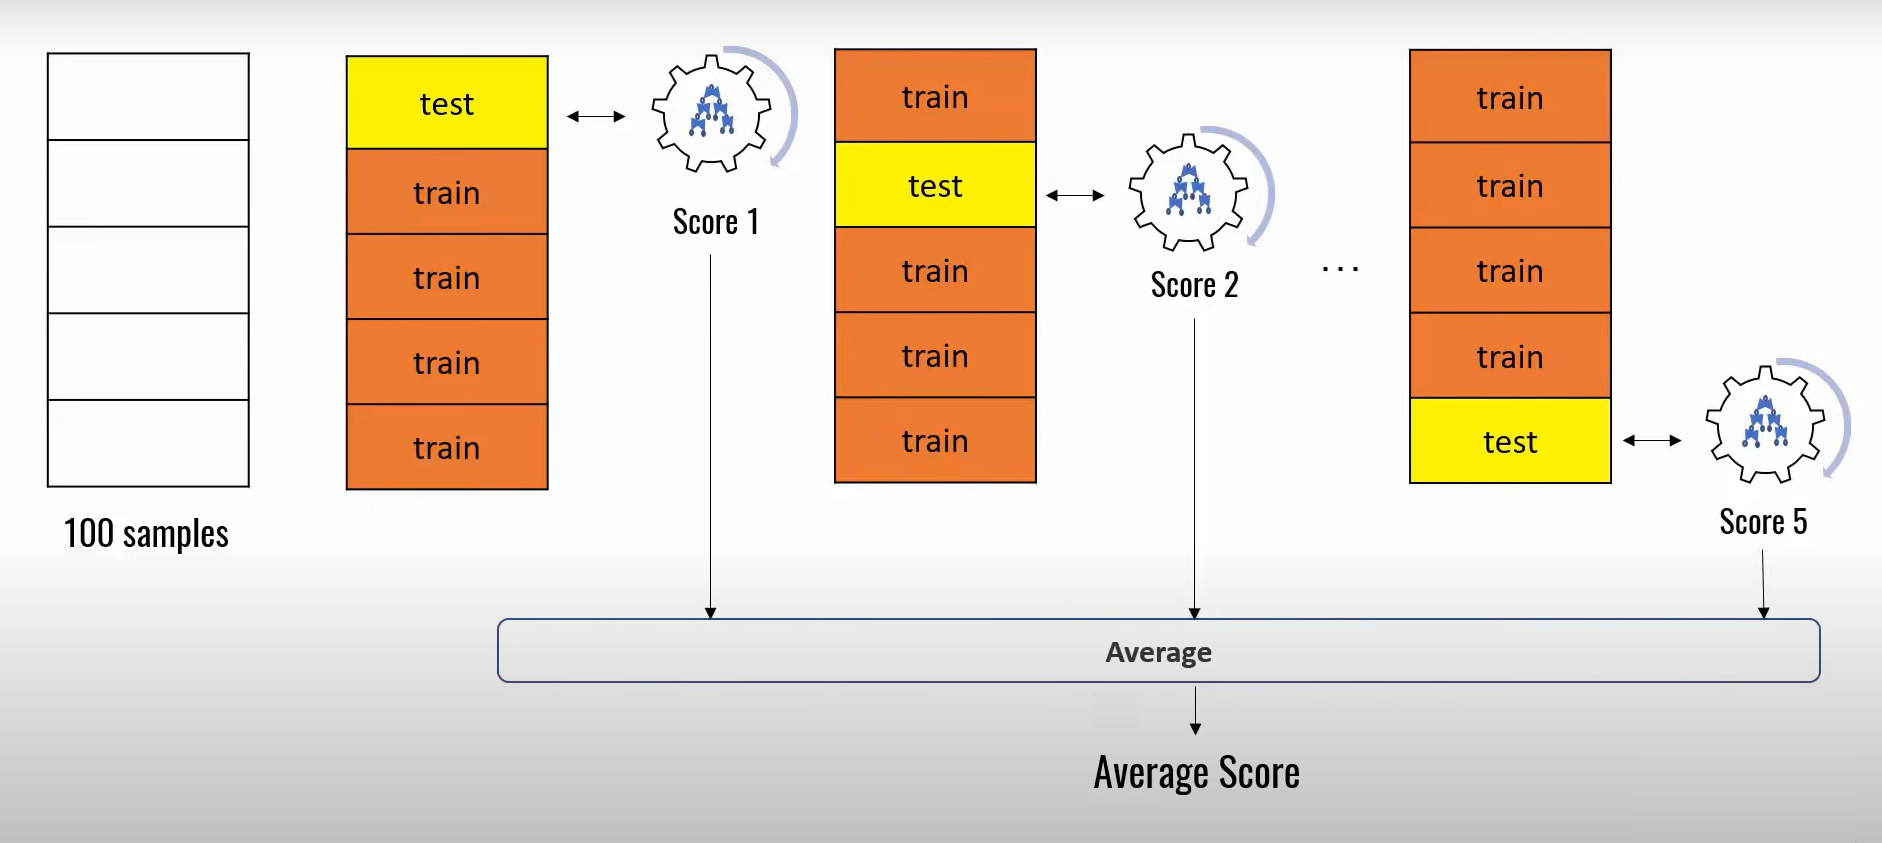

### Confusion Matrix

A confusion matrix also known as error matrix is a specific table layout that allows visualization of the algorithm performance, and is mostly used in supervised learning(Haghighi,2018).

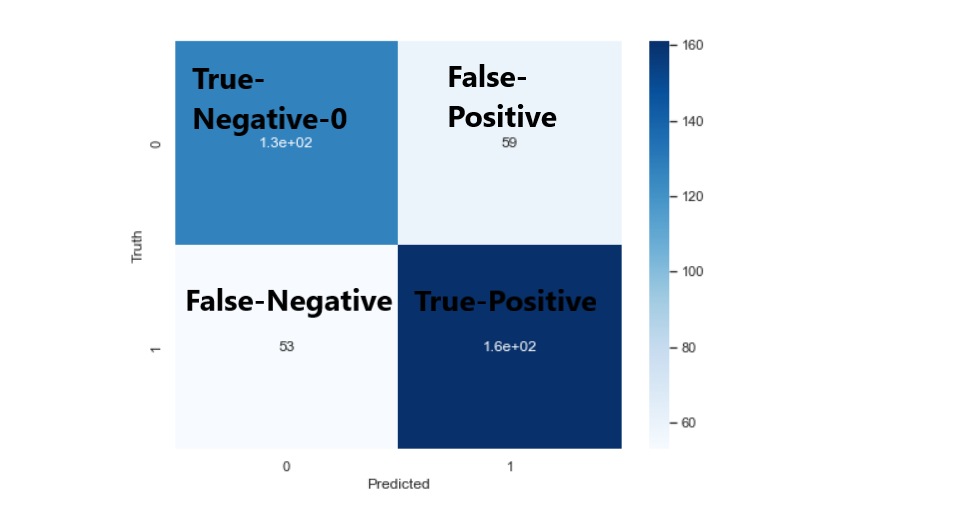

### Description of Confusion Matrix

#### Symbols in confusion matrix
    1.True Negative - TN (Truth - 0  , predicts - 1)
    2.False Positive - FP (Truth - 0 , predicts - 1)
    3.False Negative - FN (Truth - 1 , predicts -0)
    4.True Positvie - TP  (Truth - 1 , predicts - 1)


#### Formulas
Precision:  Accuracy of positive predictions
$$Precision (for 0 - Bad Quality)= \frac{TN}{TN+FN}$$ 

$$Precision (for 1 - Good Quality)=\frac{TP}{TP+FP} $$

Recall: Recall (aka sensitivity or true positive rate): Fraction of positives That were correctly identified.
$$Recall(for 0 - Bad Quality)=\frac{TN}{TN+FP}$$

$$Recall(for 1 - Good Quality)=\frac{TP}{TP+FN}$$

F1 score: F1 Score (aka F-Score or F-Measure) – A helpful metric for comparing two classifiers. F1 Score takes into account precision and the recall. It is created by finding the the harmonic mean of precision and recall.
$$F1-score = \frac{(2*Precision*Recall)}{Precision+Recall}$$

### Hyper-Tunning parameter

Normally machine learning algorithm transforms a problem that needs to be solved into an optimization problem and uses different optimization methods to solve the problem. The optimization function is composed of multiple hyperparameters that are set prior to the learning process and affect how the machine learning algorithm fits the model to data. Hyperparameters are different from the internal model parameters, such as the neural network’s weights, which can be learned from the data during the model training phase. Before the training phase, we would like to find a set of hyperparameter values which archive the best performance on the data in a reasonable amount of time. This process is called hyperparameter optimization or tuning. It plays a vital role in the prediction accuracy of machine learning algorithms. 

# Logistic Regression

Logistic Regression (LR) is one of the most important statistical and datamining techniques employed by statisticians and researchers for the analysis andclassiﬁcation of binary and proportional response data sets(Maalouf,2011).
I uses a Activation function called Sigmoid which converts every data in range between (0-1).
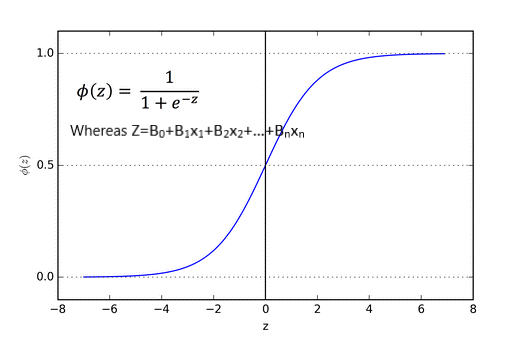

#### Example:
Formula: 
$$Z=\frac{1}{1+e^z}$$

e=euler's number = 2.718

z=-(0.16*7.4-2.53*0.70-0.95*0.00-0.11*0.64+0.44*2.57+0.45*2.39-0.69*3.52-1.00*0.99-0.29*3.51-2.2*0.57+0.87*9.4-5.27)= 1.233
$$z=\frac{1}{1+2.718^z} = \frac{1}{1+3.78} = \frac{1}{4.78} = 0.2$$
>0.2 is the output and our model has accurately gives the output i.e. 0 - Bad quality (classified 0-5 = 0 and 6-8 = 1 )

Source: Below logistic Regression - Checked Column = 1st (which has quality = 0)

# Logistic Regression

***************Accuracy*****************
Accuracy LogisticRegression() :0.7275


***************Mean Absolute Error***************
Mean absolute error : 0.2725


****************Classification Report***************
              precision    recall  f1-score   support

           0       0.71      0.70      0.71       186
           1       0.74      0.75      0.75       214

    accuracy                           0.73       400
   macro avg       0.73      0.73      0.73       400
weighted avg       0.73      0.73      0.73       400



*****************Confusion Matrix - Heatmap********************


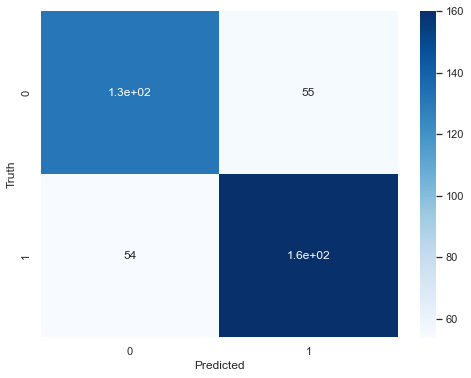

In [34]:
models_algorithm(log_mod,X_scaled_train,y_train)

>Accuracy is 73% which looks quite low but mean absolute error is 0.28 which too looks low.

>For the testing data, we have 186 and 214 samples for 0 and 1 respectively where classification report shows differnt meanings:
    >1. precision: This are the 0, out of total prediction it made of 0's, only 71% of them are correct.
    >2. Precison: Out of total prediction i made of 1's, only 74% of them are correct.
    >3. Recall for 0 i.e., 70% which means our model predicts 70% for its all values 0.
    >4. Recall for 1 i.e., 75% which means our model predicts 75% for its all values 1.
    >5. f1 score in both values looks normal due to the precision and recall of 0 and 1 which are quite good.


>From the confusion matrix, we can see many relation between above classification report like every terms are related with each other. Its values are dependent on Classification report. Let's see what are values we get from Confusion-matrix:
    >1. We have 132 data set which has value 0 and our model predict it 0.
    >2. We have 55 data set whcih has value 0 but our model predict 1 which is not correct.
    >3. 54 times our data set was 1 but our model predict it uncorrectly i.e., 0
    >4. But our model predict 162 times correctly
    
    
 Let's check via Cross-validation. whether the accuracy rate increases or not. Let's find it

### Hypertunning the parameter

***************Accuracy*****************
Accuracy LogisticRegression() :0.7275


***************Mean Absolute Error***************
Mean absolute error : 0.2725


****************Classification Report***************
              precision    recall  f1-score   support

           0       0.71      0.70      0.71       186
           1       0.74      0.75      0.75       214

    accuracy                           0.73       400
   macro avg       0.73      0.73      0.73       400
weighted avg       0.73      0.73      0.73       400



*****************Confusion Matrix - Heatmap********************


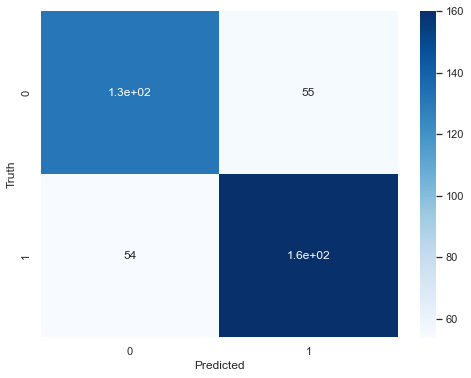

In [35]:
models_algorithm(LogisticRegression(solver='lbfgs'),X_scaled_train,y_train) # lbfgs

***************Accuracy*****************
Accuracy LogisticRegression(solver='liblinear') :0.7375


***************Mean Absolute Error***************
Mean absolute error : 0.2625


****************Classification Report***************
              precision    recall  f1-score   support

           0       0.72      0.71      0.72       186
           1       0.75      0.76      0.76       214

    accuracy                           0.74       400
   macro avg       0.74      0.74      0.74       400
weighted avg       0.74      0.74      0.74       400



*****************Confusion Matrix - Heatmap********************


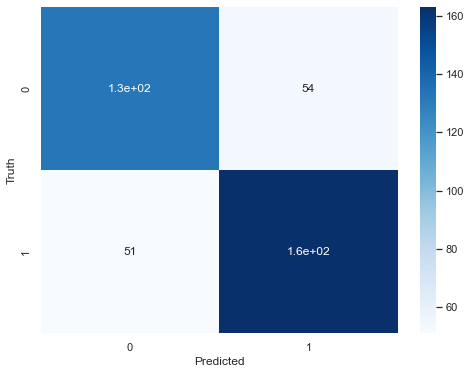

In [36]:
models_algorithm(LogisticRegression(solver='liblinear'),X_scaled_train,y_train) #liblinear

> After hypertunnning the parameter in logistci regression, it can be seen that, the model has increase accuracy score by slight margin. Let's see what can be the error in model. 

#### Checking accuracy of the training samples  

In [37]:
log_mod.fit(X_scaled_train,y_train) #training
y_pred=log_mod.predict(X_scaled_test)

log_mod.score(X_scaled_train,y_train) # Score of training dataset

0.7489574645537949

### Here, it can be seen training score is 75% thus, it can be said due to imbalance 0 and 1 data in trainig and testing set which is Undersample Thus, Uderfit of model


In [38]:
clf = LogisticRegression(C= 1000, penalty= 'l2')
clf.fit(X_scaled_train,y_train)
pred = clf.predict(X_scaled_test)
#clf.score(X_scaled_test,y_test)
#clf.score(X_scaled_train,y_train)
print("Non Zero weights:",np.count_nonzero(clf.coef_))

Non Zero weights: 11


#### Slope (m or theta1)

In [39]:
log_mod.coef_

array([[ 0.16061271, -2.53438448, -0.9433854 , -0.11591555, -0.4467675 ,
         0.4460298 , -0.68424987, -0.99884843, -0.28404213,  2.19265552,
         0.86775957]])

#### Y_intercept(bias)

In [40]:
log_mod.intercept_

array([-5.32242917])

#### Accuracy is preety low. We are going to use more sophisticated model to check whether accuracy increases or not.

### Model via Cross-validation

In [41]:
score=cross_val_score(log_mod,X_scaled_train,y_train,cv=5)
np.average(score)

0.7406415620641562

In [42]:
score=cross_val_score(log_mod,X_scaled_train,y_train,cv=50)
np.average(score)

0.7481159420289855

>Here, we can see the accuracy incrases using Cross-validation. we try scalling the cv to 500 but the accuracy rate doesn't much increases. The score remains around 74-75% inspite of implementing cv till 500.

# DecisionTreeClassifier model via Cross-validation

According to (LU, 2015), Decision tree methodology is a commonly used data mining method for establishing classification systems based on multiple covariates or for developing prediction algorithms for a target variable. This method classifies a population into branch-like segments that construct an inverted tree with a root node, internal nodes, and leaf nodes. The algorithm is non-parametric and can efficiently deal with large, complicated datasets without imposing a complicated parametric structure. When the sample size is large enough, study data can be divided into training and validation datasets. Using the training dataset to build a decision tree model and a validation dataset to decide on the appropriate tree size needed to achieve the optimal final model.

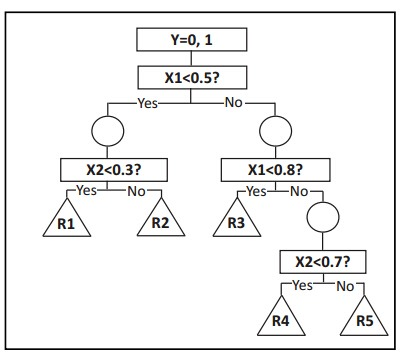

> Entropy is a measure of the randomness in the information being processed. The higher the entropy, the harder it is to draw any conclusions from that information. Flipping a coin is an example of an action that provides information that is random.

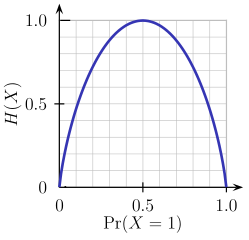

Entropy for multiple attributes is:

$$E(T,x)=\sum\limits_{c=X}P(c)E(c)$$

whereas, T--> Current state and x --> selected attribute

#### Example:
Formula:$$\frac{(x_{i}-\bar{x})}{std.}$$

alcohol = 9.4

Good-Quality (1) = 22
Bad-Quality (0) =81
Total = 103


$$E(s)=\sum\limits_{i=1}{-p_{i}}{log_{2}}{p_{i}}$$

$$Entropy(s_{alcohol==9.4})={-(\frac{22}{103})log_{2}(\frac{22}{103})}-{(\frac{81}{103})log_{2}(\frac{81}{103})}$$

$$Entropy(s_{alcohol==9.4}) = 0.14+0.08 = 0.22 $$
>>which is entropy for alcohol which has value 9.4 with respect to quality. In this way, each particular value from the column will be calculated.

***************Accuracy*****************
Accuracy DecisionTreeClassifier() :0.74


***************Mean Absolute Error***************
Mean absolute error : 0.26


****************Classification Report***************
              precision    recall  f1-score   support

           0       0.72      0.73      0.72       186
           1       0.76      0.75      0.76       214

    accuracy                           0.74       400
   macro avg       0.74      0.74      0.74       400
weighted avg       0.74      0.74      0.74       400



*****************Confusion Matrix - Heatmap********************


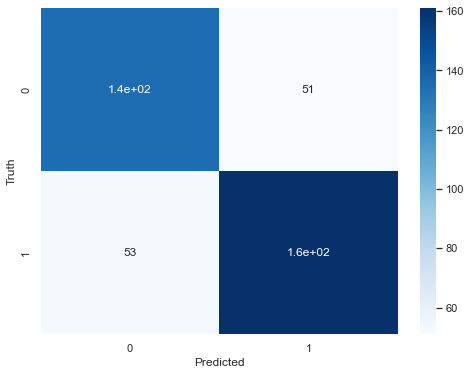

In [43]:
models_algorithm(dec_mod,X_scaled_train,y_train) # Decision tree

>The accuracy of the model is 72% which is quite not too good. 
>The mean-absolute arror is 0.28 which too look not satisfactory.

From the above classification report and confusion matrix, we can see differnt terms.

>For the testing data, we have 186 and 214 samples for 0 and 1 respectively where classification report shows differnt meanings:
    >1. precision: This are the 0, out of total prediction it made of 0's, only 70% of them are correct.
    >2. Precison: Out of total prediction i made of 1's, only 73% of them are correct.
    >3. Recall for 0 i.e., 68% which means our model predicts 68% for its all values 0.
    >4. Recall for 1 i.e., 75% which means our model predicts 75% for its all values 1.
    >5. f1 score in both values looks normal due to the precision and recall of 0 and 1 which are quite good.

>From the confusion matrix, we can see many relation between above classification report like every terms are related with each other. Its values are dependent on Classification report. Let's see what are values we get from Confusion-matrix:
    >1. We have 132 data set which has value 0 and our model predict it 0.
    >2. We have 55 data set whcih has value 0 but our model predict 1 which is not correct.
    >3. 52 times our data set was 1 but our model predict it uncorrectly i.e., 0
    >4. But our model predict 162 times correctly
    
>From the confusion matrix heatmap, classification report, mean-absoulute error and accuracy rate, it can presume this model too doesn't works as we expected. Lets hypertuned the parameter: 

### Hypertunning the parameter via cross-validation

In [44]:
dec_mod=DecisionTreeClassifier(criterion='gini') # gini
dec_mod.fit(X_scaled_train,y_train) 
dec_mod.score(X_scaled_test,y_test)

0.715

In [45]:
score=cross_val_score(dec_mod,X_scaled_train,y_train,cv=60)  #Cross-validation : cv=5
np.average(score)

0.7773245614035088

In [46]:
score=cross_val_score(DecisionTreeClassifier(criterion='gini'),X_scaled_train,y_train,cv=50) #Cross-validation :citerion=gini
np.average(score)

0.7614492753623189

>Accuracy doesn't increses much with cross validation but There is like 4% increase in accuracy in our model via cross-valdidation. Here, too Cross-validation preety works good.

# RandomForestClassifer as a base model via Cross-validation

A random forest (RF) classifier is an ensemble classifier that produces multiple decision trees, using a randomly selected subset of training samples and variables. This classifier has become popular within the remote sensing community due to the accuracy of its classifications(Mariana Belgiua and Lucian Drăguţ, 2016).

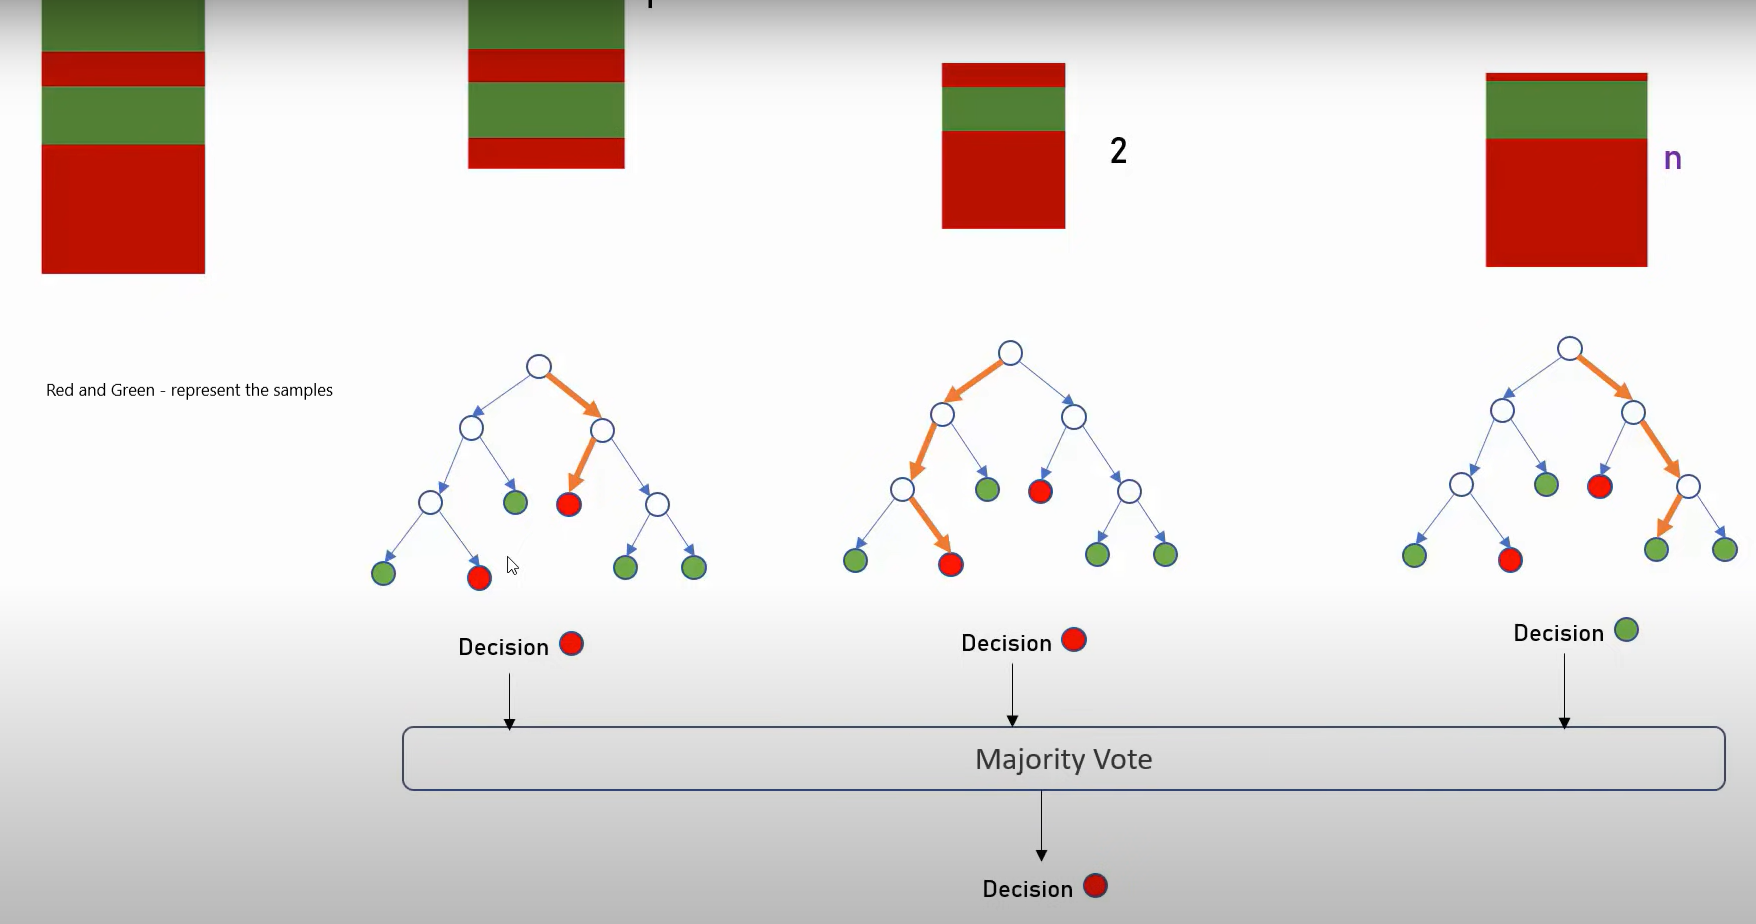

> For our model which is classification type, we should use Entropy like we use in Decision Tree classifier.

### Formula

$$Entropy=\sum\limits_{i=1}^{c}-f_{i}log(f_{i})$$

$$f_{i} is the frequency of label "i" at a node and c is the units of unique labels.$$

***************Accuracy*****************
Accuracy RandomForestClassifier(n_estimators=50) :0.7925


***************Mean Absolute Error***************
Mean absolute error : 0.2075


****************Classification Report***************
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       186
           1       0.80      0.82      0.81       214

    accuracy                           0.79       400
   macro avg       0.79      0.79      0.79       400
weighted avg       0.79      0.79      0.79       400



*****************Confusion Matrix - Heatmap********************


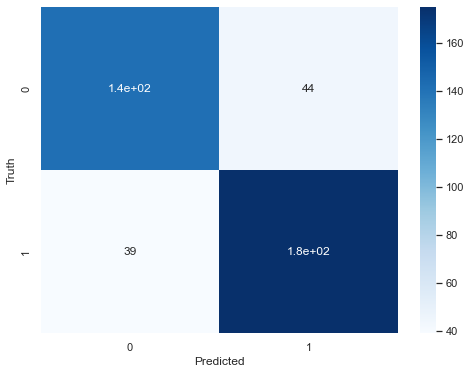

In [47]:
models_algorithm(RandomForestClassifier(n_estimators=50),X_scaled_train,y_train) #Random Forest classifier

>The accuracy of the model is 80% which is quite not too good. 
>The mean-absolute arror is 0.20  which too look not satisfactory.

From the above classification report and confusion matrix, we can see differnt terms.

>For the testing data, we have 186 and 214 samples for 0 and 1 respectively where classification report shows differnt meanings:
    >1. precision: This are the 0, out of total prediction it made of 0's, only 79% of them are correct.
    >2. Precison: Out of total prediction i made of 1's, only 81% of them are correct.
    >3. Recall for 0 i.e., 78% which means our model predicts 78% for its all values 0.
    >4. Recall for 1 i.e., 79% which means our model predicts 82% for its all values 1.
    >5. f1 score in both values looks good compare to f1 score of logistic regression and Decision tree.

>From the confusion matrix, we can see many relation between above classification report like every terms are related with each other. Its values are dependent on Classification report. Let's see what are values we get from Confusion-matrix:
    >1. We have 142 data set which has value 0 and our model predict it 0.
    >2. We have 41 data set whcih has value 0 but our model predict 1 which is not correct.
    >3. 38 times our data set was 1 but our model predict it uncorrectly i.e., 0
    >4. But our model predict 182 times correctly
    
>From the confusion matrix heatmap, classification report, mean-absoulute error and accuracy rate, it can presume this model perform very good compare to above models. 

In [48]:
rf_mod.fit(X_scaled_train,y_train)
y_pred=rf_mod.predict(X_scaled_test)
rf_mod.score(X_scaled_test,y_test)
rf_mod.score(X_scaled_train,y_train) # Score of training dataset

1.0

#### No issue of underfit in RandomForest

In [49]:
score=cross_val_score(RandomForestClassifier(n_estimators=50),X_scaled_train,y_train,cv=100)
np.average(score)

0.8123484848484849

In [50]:
score=cross_val_score(RandomForestClassifier(n_estimators=50),X_scaled_train,y_train,cv=50)
np.average(score)

0.81731884057971

>Looks excellent via Cross-validation. The model gives round of 82% accuracy. This is the best model till now which gives high accuaracy.

# Support Vector Machine as a base model via Cross-validation

The Support Vector Machine approach uses the kernel method, discussed below, to map the
data with a non-linear transformation to a higher dimensional space and in that space attempts to nd a
linear separating surface between the two classes(Gualtieria).
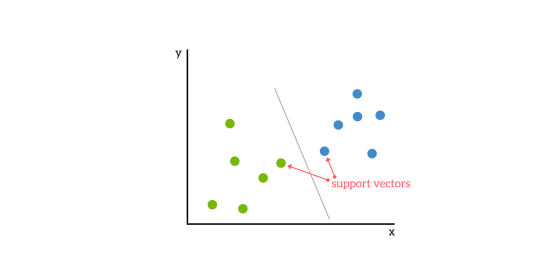

***************Accuracy*****************
Accuracy SVC() :0.705


***************Mean Absolute Error***************
Mean absolute error : 0.295


****************Classification Report***************
              precision    recall  f1-score   support

           0       0.67      0.73      0.70       186
           1       0.74      0.68      0.71       214

    accuracy                           0.70       400
   macro avg       0.71      0.71      0.70       400
weighted avg       0.71      0.70      0.71       400



*****************Confusion Matrix - Heatmap********************


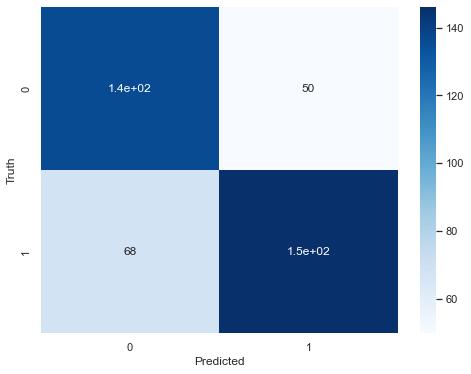

In [51]:
models_algorithm(svc_model,X_scaled_train,y_train) # support vector machine

>The accuracy of the model is 71% which can be considered to be bad compare to other models. 
>The mean-absolute arror is 0.29 which is too bad.

From the above classification report and confusion matrix, we can see differnt terms.

>For the testing data, we have 186 and 214 samples for 0 and 1 respectively where classification report shows differnt meanings:
    >1. precision: This are the 0, out of total prediction it made of 0's, only 67% of them are correct.
    >2. Precison: Out of total prediction i made of 1's, only 74% of them are correct.
    >3. Recall for 0 i.e., 75% which means our model predicts 73% for its all values 0.
    >4. Recall for 1 i.e., 65% which means our model predicts 68% for its all values 1.
    >5. f1 score in both values looks good compare to f1 score of logistic regression and Decision tree.

>From the confusion matrix, we can see many relation between above classification report like every terms are related with each other. Its values are dependent on Classification report. Let's see what are values we get from Confusion-matrix:
    >1. We have 142 data set which has value 0 and our model predict it 0.
    >2. We have 46 data set whcih has value 0 but our model predict 1 which is not correct.
    >3. 75 times our data set was 1 but our model predict it uncorrectly i.e., 0
    >4. But our model predict 142 times correctly
    
>From the confusion matrix heatmap, classification report, mean-absoulute error and accuracy rate, it can presume this model perform very bad compare to other models. Let's use cross validation then check the accuracy:  

In [52]:
svc_model.fit(X_scaled_train,y_train)
svc_model.score(X_scaled_test,y_test)
svc_model.score(X_scaled_train,y_train) # Score of Traininng dataset

0.7414512093411176

##### Pretty much, Here in SVM too, their is problem of Underfitting, Let's try tunning parameters :

In [53]:
score3=cross_val_score(SVC(),X_scaled_train,y_train,cv=50)
np.average(score3)

0.7364492753623187

#### HyperTunning the parameters to check models accuracy

In [54]:
score3=cross_val_score(SVC(kernel='sigmoid'),X_scaled_train,y_train,cv=50) #sigmoid
np.average(score3)

0.3753260869565217

In [55]:
score3=cross_val_score(SVC(kernel='rbf'),X_scaled_train,y_train,cv=50) #rbf
np.average(score3)

0.7364492753623187

In [56]:
score3=cross_val_score(SVC(kernel='linear'),X_scaled_train,y_train,cv=50) #linear
np.average(score3)

0.7439130434782608

In [57]:
score3=cross_val_score(SVC(C=10),X_scaled_train,y_train,cv=50) #Reguralization
np.average(score3)

0.7464492753623189

In [58]:
score3=cross_val_score(SVC(C=5),X_scaled_train,y_train,cv=50) #Reguralization
np.average(score3)

0.7456521739130434

In [59]:
score3=cross_val_score(SVC(gamma=10),X_scaled_train,y_train,cv=50) #Gamma
np.average(score3)

0.7264855072463767

In [60]:
score3=cross_val_score(SVC(gamma=5),X_scaled_train,y_train,cv=50) #Gamma
np.average(score3)

0.7681159420289855

#### It can be concluded that Parameter tunning is good approach to increase the accuracy score of the specific model but sometimes it also gives unexpected results.

I was in dilemma seeing the accuracy score of 'sigmoid'. My view on sigmoid may be different or i need to study more about it. I thought it always works on 0 and 1 so, it may work good due to the model's target features which has binary values. Instead of it, it scores less compare to other hypertunned parameters. 

rbf and linear were simple svm tunning parameters so, it has no issue on the dataset as i think.

Reguralization works with the support vector more closely compare than Gamma which works with support vectors more sparsely which is the reason why Gamma works better compare to Reguralization.

#### It can be concluded that, SVM() works fine.

## Naive_bayes model via Cross-validation

A Naive Bayes classifier is a probabilistic machine learning model that’s used for classification task based on the Bayes theorem. Because they are so fast and have so few tunable parameters, they end up being very useful as a quick-and-dirty baseline for a classification problem. 


Gaussian Naive Bayes:
When the predictors take up a continuous value and are not discrete, we assume that these values are sampled from a gaussian distribution.
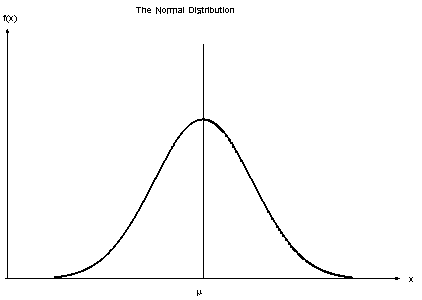

#### Formula:
$$P(\frac{x_{i}}{y})=\frac{1}{sqrt{2*pi*act.{limits_}{y}^2}$$

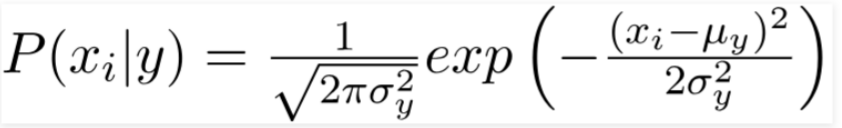

***************Accuracy*****************
Accuracy GaussianNB() :0.7025


***************Mean Absolute Error***************
Mean absolute error : 0.2975


****************Classification Report***************
              precision    recall  f1-score   support

           0       0.65      0.77      0.71       186
           1       0.76      0.64      0.70       214

    accuracy                           0.70       400
   macro avg       0.71      0.71      0.70       400
weighted avg       0.71      0.70      0.70       400



*****************Confusion Matrix - Heatmap********************


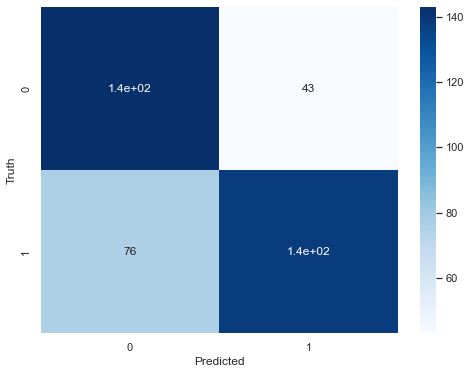

In [61]:
from sklearn.naive_bayes import GaussianNB   #Naive_bayes - GaussianNB
models_algorithm(GaussianNB(),X_scaled_train,y_train)

>The accuracy of the model is 70% which can be considered to be bad compare to other models. 
>The mean-absolute arror is 0.30 which is too bad.

From the above classification report and confusion matrix, we can see differnt terms.

>For the testing data, we have 186 and 214 samples for 0 and 1 respectively where classification report shows differnt meanings:
    >1. precision: This are the 0, out of total prediction it made of 0's, only 65% of them are correct.
    >2. Precison: Out of total prediction i made of 1's, only 76% of them are correct.
    >3. Recall for 0 i.e., 75% which means our model predicts 77% for its all values 0.
    >4. Recall for 1 i.e., 65% which means our model predicts 64% for its all values 1.
    >5. f1 score in both values looks good compare to f1 score of logistic regression and Decision tree.

>From the confusion matrix, we can see many relation between above classification report like every terms are related with each other. Its values are dependent on Classification report. Let's see what are values we get from Confusion-matrix:
    >1. We have 142 data set which has value 0 and our model predict it 0.
    >2. We have 43 data set whcih has value 0 but our model predict 1 which is not correct.
    >3. 76 times our data set was 1 but our model predict it uncorrectly i.e., 0
    >4. But our model predict 142 times correctly
    
>From the confusion matrix heatmap, classification report, mean-absoulute error and accuracy rate, it can presume this model perform very bad compare to other models. Let's use cross validation then check the accuracy:  

In [62]:
score=cross_val_score(GaussianNB(),X_scaled_train,y_train,cv=100) # Cross validation
np.average(score) 

0.742348484848485

>Scores increseas when using cross validation by 4% which is considered great in Data science and Machine Learinig areas.

# Neural network

Inspired by the sophisticated functionality of human brains where hundreds of billions of interconnected neurons process information in parallel, researchers have successfully tried demonstrating certain levels of intelligence on silicon(Sun-Chong Wang ,2003).

"Sophie" is a AI female robot which recently got a citizenship of Saudia Arabia is the perfect example of AI's development. She has the ability to discuss with peoples like a normal people. 

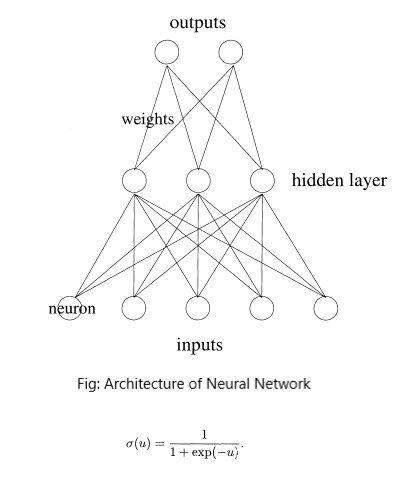

In [ ]:
# Tensorflow libraries
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(X_scaled_train.shape[1],), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_scaled_train, y_train, epochs=50,) # Training with ecpohs 1000

In [ ]:
model.evaluate(X_scaled_train,y_train)  # Accuracy of NN model

In [ ]:
yp=model.predict(X_scaled_test)  # Prediction of the NN model
yp[:10]

In [ ]:
y_pred_ai=[]
for element in yp:
    if element >0.5:
        y_pred_ai.append(1)
    else:
        y_pred_ai.append(0)

In [ ]:
print('********************** Classification Report ************************')
print(classification_report(y_test,y_pred_ai))
print('\n')

print('********************** Confusion Matrix ******************************')
cm=confusion_matrix(y_test,y_pred_ai)
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

>The accuracy of the model is 80% which can be considered to be bad compare to other models. 
>The mean-absolute arror is 0.20 which is too bad.

From the above classification report and confusion matrix, we can see differnt terms.

>For the testing data, we have 186 and 214 samples for 0 and 1 respectively where classification report shows differnt meanings:
    >1. precision: This are the 0, out of total prediction it made of 0's, only 73% of them are correct.
    >2. Precison: Out of total prediction i made of 1's, only 71% of them are correct.
    >3. Recall for 0 i.e., 75% which means our model predicts 62% for its all values 0.
    >4. Recall for 1 i.e., 65% which means our model predicts 80% for its all values 1.
    >5. f1 score in both values looks good compare to f1 score of logistic regression and Decision tree.

>From the confusion matrix, we can see many relation between above classification report like every terms are related with each other. Its values are dependent on Classification report. Let's see what are values we get from Confusion-matrix:
    >1. We have 122 data set which has value 0 and our model predict it 0.
    >2. We have 70 data set whcih has value 0 but our model predict 1 which is not correct.
    >3. 43 times our data set was 1 but our model predict it uncorrectly i.e., 0
    >4. But our model predict 172 times correctly
    
Neural network has also provides the accuracy similar to the RandomForest Classifier, It is good in learinig by self, it uses the neurals like human brain. Image, video etc classification are the areas Neural Network is doing great job nowadays.  

# Conclusion
Finally, we tried K-fold cross validation with different models with the view of acieving maximum accuracy score.The scores afre given below: 

> #### Logistic Regression
    >1. LogisticRegression = 73 while tunning it gives 74
    >2. LogisticRegresson via Cross-validation = 74, 75 with CV = 5, 50 respectively

> #### Decision Tree Classifier
    >1.  Decison Tree = 72 with gini = 73%
    >2.  DecisionTreeClassifer with Cross-validation = 78% , CV=5 and gini = 76, cv=50

> #### Random Forest Classifier
    >1.  RandomForestClassifier = 80%
    >2.  RandomForest via Cross-validation = 80%, 82% with cv= 50 ,100 respectively

> #### Support Vector Machine
    >1.  Support Vector Machine = 70%
    >2.  SVC via Cross-validation  = 74% with cv = 50

>> #### HyperTunning parameters via Cross-validation (SVM)
    >>1.  Sigmoid = 38%, cv = 50
    >>2.  rbf = 74%, cv = 74
    >>3.  linear = 74%, cv = 50
    >>4.  Reguralization, 75% (C= 10), 74% (C=5) with cv = 50, 50 respectively
    >>5.  Gamma, 73% (g=10), 77% (g=5) with cv = 50, 50 respectively

> #### Naive Bayes (GaussianNB)
    >1.  GaussianNB = 70% 
    >2.  GaussianNB via Cross-validation = 74% with cv = 100
    
> #### Neural Network
    1. ANN = 80% with epoch = 1000

From the above scores, we can find out RandomForestClassifier() and Neural Network has preety much same accuracy. Also ehy both had 80% accuracy which is best comparing with other models. 
Hence, In this dataset, RandomForestClassifier via cross validation can be sauid as best model with NN as substuite because it uses differnt approach to do same task. 